# install dependency 


In [112]:
import tensorflow as tf
import os 
import matplotlib.pyplot as plt
import tensorflow_io as tfio 

# 2) building data loading function

In [113]:
BASE = os.path.join("data")
one_file = os.path.join(BASE,"Parsed_Capuchinbird_Clips")
zero_file = os.path.join(BASE,"Parsed_Not_Capuchinbird_Clips")

In [114]:
ex1 = os.path.join(one_file,"XC3776-0.wav")
ex0 = os.path.join(zero_file, "afternoon-birds-song-in-forest-0.wav")

### building fucntion to laod the data

In [115]:
# def load_wav_16k_mono(filename):
#     # Load encoded wav file
#     file_contents = tf.io.read_file(filename)
#     # Decode wav (tensors by channels) 
#     wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
#     # Removes trailing axis
#     wav = tf.squeeze(wav, axis=-1)
#     sample_rate = tf.cast(sample_rate, dtype=tf.int64)
#     # Goes from 44100Hz to 16000hz - amplitude of the audio signal
#     wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
#     return wav

# def load_wav_16k_mono(filename):
#     # Load encoded wav file
#     file_contents = tf.io.read_file(filename)
#     # Decode wav (tensors by channels) 
#     wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
#     # Removes trailing axis
#     wav = tf.squeeze(wav, axis=-1)
#     sample_rate = tf.cast(sample_rate, dtype=tf.int64)
#     # Goes from 44100Hz to 16000hz - amplitude of the audio signal
#     wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
#     return wav

In [116]:
file_contents = tf.io.read_file(ex1)
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels = 1)

In [117]:
print(wav)

tf.Tensor(
[[-0.1289978 ]
 [-0.15133667]
 [-0.14691162]
 ...
 [ 0.11514282]
 [ 0.10748291]
 [ 0.1100769 ]], shape=(132300, 1), dtype=float32)


In [118]:
# import librosa

# #function to sample the audio file
# def load_wav_16k_mono(filename):
#     wav, sample_rate = librosa.load(filename, sr=16000, mono=True)
#     return wav

def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav


# def load_wav_16k_mono(filename):
#     # Load encoded wav file
#     file_contents = tf.io.read_file(filename)
#     # Decode wav (tensors by channels) 
#     wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
#     # Removes trailing axis
#     wav = tf.squeeze(wav, axis=-1)
#     sample_rate = tf.cast(sample_rate, dtype=tf.int64)
#     # Goes from 44100Hz to 16000hz - amplitude of the audio signal
#     wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
#     return wav

In [119]:
# ploating the wave
wave = load_wav_16k_mono(ex1)
nwave = load_wav_16k_mono(ex0)


AttributeError: in user code:

    File "/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow_io/python/ops/audio_ops.py", line 465, in f
        return core_ops.io_audio_resample(
    File "/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py", line 88, in __getattr__
        return getattr(self._load(), attrb)

    AttributeError: module '77ab628d7ad4acaa62f6bde524b9d631895821c9' has no attribute 'io_audio_resample'


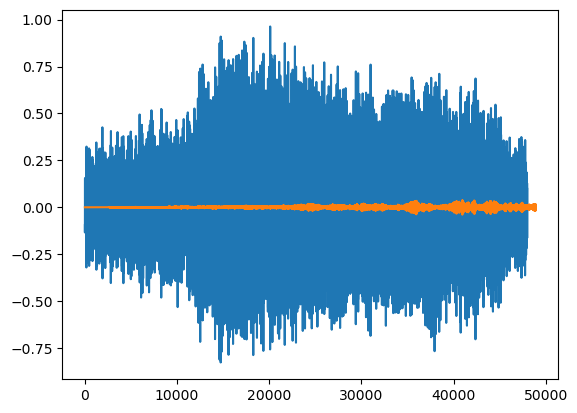

In [82]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

## creating a tensorflow dataset

In [107]:
#defining the dataset path
POS = os.path.join('data','Parsed_Capuchinbird_Clips')
NOS = os.path.join('data','Parsed_Not_Capuchinbird_Clips')

'data/Parsed_Capuchinbird_Clips'

In [109]:
#creating tensorflow dataset
pos = tf.data.Dataset.list_files(POS+'/*.wav')
nos = tf.data.Dataset.list_files(NOS+'/*.wav')


b'data/Parsed_Capuchinbird_Clips/XC387509-5.wav'


In [85]:
pos.as_numpy_iterator().next()

b'data/Parsed_Capuchinbird_Clips/XC16803-0.wav'

In [86]:
# adding labels and positive and negative samples
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((nos, tf.data.Dataset.from_tensor_slices(tf.ones(len(nos)))))
data = positives.concatenate(negatives)

In [105]:
# for i in data.as_numpy_iterator():
#     print(str(i[0]))
#     # Convert bytes to string
#     byte_data = i[0]
#     string_data = byte_data.decode('utf-8')
#     print(f"the str data is : {string_data}")
#     break

b'data/Parsed_Capuchinbird_Clips/XC16804-0.wav'
the str data is : data/Parsed_Capuchinbird_Clips/XC16804-0.wav


In [87]:
positives.as_numpy_iterator().next()

(b'data/Parsed_Capuchinbird_Clips/XC388470-3.wav', 1.0)

In [88]:
negatives.as_numpy_iterator().next()

(b'data/Parsed_Not_Capuchinbird_Clips/killdeer-sound-9.wav', 1.0)

## 4) determining each call

In [89]:
# calculating wave cycle length
lengths = []
for file in os.listdir(os.path.join('data','Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file ))
    lengths.append(len(tensor_wave))

In [90]:
cycle_value = tf.math.reduce_mean(lengths)

In [91]:
print(f"the average call is of {cycle_value/16000} seconds.")

the average call is of 3.38475 seconds.


In [92]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [93]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

## function to convert to spectrogram

In [94]:
def preprocess(file_path, label):
    # Load the audio waveform as a 1D tensor
    wav = load_wav_16k_mono(file_path)
    
    # Truncate the waveform if it's longer than 48000 samples
    wav = wav[:48000]

    # Get the current length of the waveform
    wav_length = tf.shape(wav)[0]

    # Calculate the padding needed to make the waveform 48000 samples long
    padding_needed = 48000 - wav_length

    # If padding is needed, create a tensor of zeros and concatenate to the wav
    zero_padding = tf.zeros([padding_needed], dtype=tf.float32)
    wav = tf.concat([wav, zero_padding], axis=0)

    # Compute the Short-Time Fourier Transform (STFT) of the waveform
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)

    # Take the absolute value of the spectrogram to get the magnitude
    spectrogram = tf.abs(spectrogram)

    # Expand dimensions to add a channel dimension (for use in CNNs)
    spectrogram = tf.expand_dims(spectrogram, axis=2)

    return spectrogram, label

### 5.1) testing out the function and visualising the spectrogram

In [95]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [96]:
spectrogram, label = preprocess(filepath, label)

In [97]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[2.4117693e-02],
        [5.2003417e-02],
        [9.5256113e-02],
        ...,
        [1.3162654e-04],
        [1.0811970e-04],
        [8.3014369e-05]],

       [[2.5651157e-02],
        [4.9874287e-02],
        [1.0523193e-01],
        ...,
        [5.1551404e-05],
        [2.1404174e-05],
        [2.0131469e-05]],

       [[1.5009187e-02],
        [4.4341285e-02],
        [1.0375773e-01],
        ...,
        [2.9561192e-05],
        [2.8439857e-05],
        [5.8636069e-06]],

       ...,

       [[6.6450462e-03],
        [2.5727037e-02],
        [5.9278540e-02],
        ...,
        [2.6284491e-05],
        [3.3991753e-05],
        [1.8171966e-05]],

       [[1.2907319e-02],
        [3.0650733e-02],
        [5.7635747e-02],
        ...,
        [3.2571745e-05],
        [2.0950310e-06],
        [1.0974705e-05]],

       [[2.4701655e-02],
        [3.4861118e-02],
        [4.6492357e-02],
        ...,
        [1.2904999

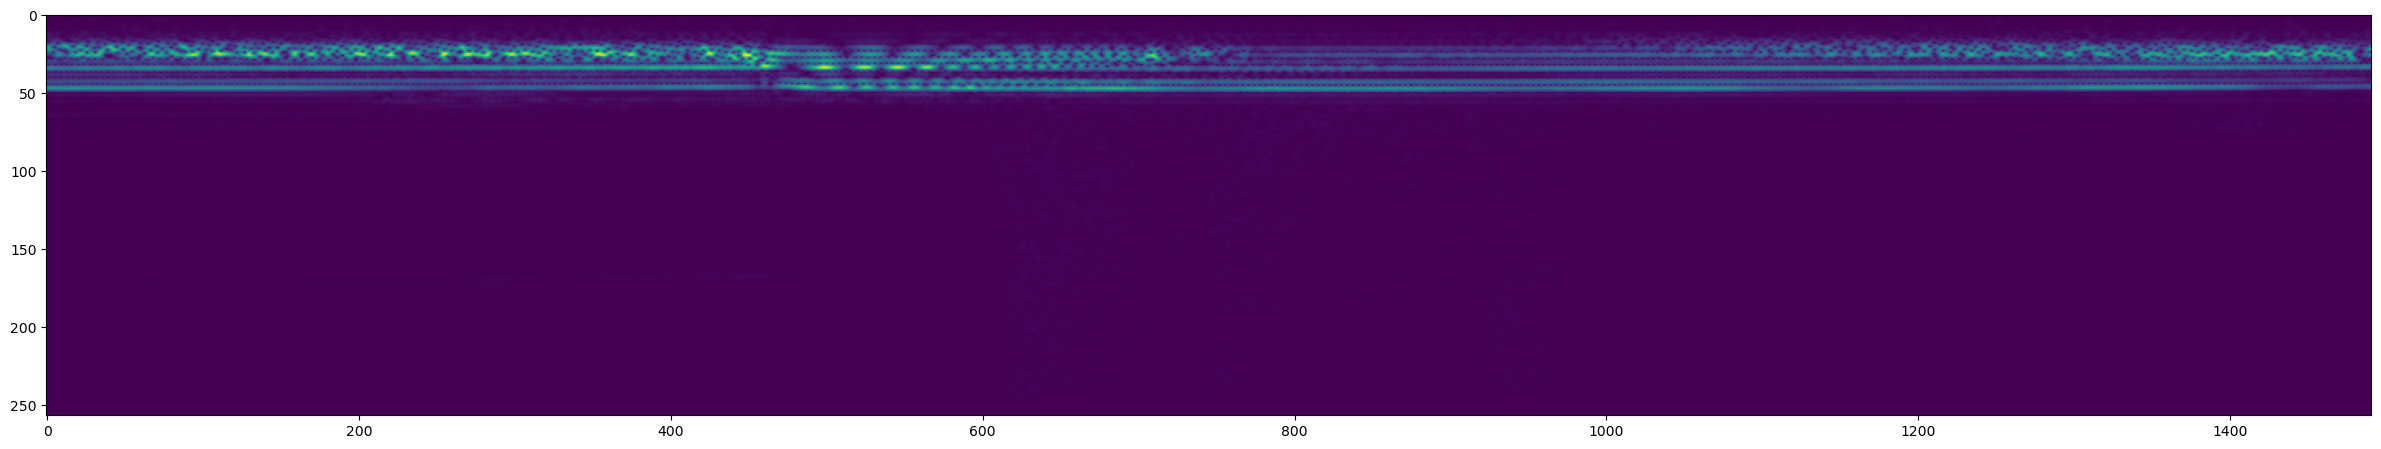

In [98]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6)creating training and testing prtition

### 6.1) creating tensorflow data pipeline

In [101]:
for filepath, label in data.take(1):
    print("Filepath:", filepath.numpy(), "Label:", label.numpy())

Filepath: b'data/Parsed_Capuchinbird_Clips/XC178168-2.wav' Label: 1.0


2024-09-21 16:49:12.448317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


b'data/Parsed_Capuchinbird_Clips/XC216012-7.wav'


In [100]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

TypeError: in user code:

    File "/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_10254/2133480935.py", line 3, in preprocess  *
        wav = load_wav_16k_mono(file_path)
    File "/var/folders/xb/sshzwv1128l88chp71np05t40000gn/T/ipykernel_10254/1715528174.py", line 5, in load_wav_16k_mono  *
        wav, sample_rate = librosa.load(filename, sr=16000, mono=True)
    File "/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/librosa/core/audio.py", line 176, in load  *
        y, sr_native = __soundfile_load(path, offset, duration, dtype)
    File "/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/librosa/core/audio.py", line 209, in __soundfile_load  *
        context = sf.SoundFile(path)
    File "/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/soundfile.py", line 658, in __init__  **
        self._file = self._open(file, mode_int, closefd)
    File "/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/soundfile.py", line 1212, in _open
        raise TypeError("Invalid file: {0!r}".format(self.name))

    TypeError: Invalid file: <tf.Tensor 'args_0:0' shape=() dtype=string>


In [43]:
train  = data.take(36)
test = data.skip(36).take(15)

### 6.3) testing one batch

In [44]:
samples, labels = train.as_numpy_iterator().next()

In [46]:
samples.shape

AttributeError: 'bytes' object has no attribute 'shape'